<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## Predictions: Regression for Car Mileage and Diamond Price


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/CarsnDiamonds.png" width="50%">


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to use a car data set to train a regression model that will predict the mileage of a car.</p>


## **Table of Contents**

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Examples">Examples</a>
        <ol>
            <li><a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe</a></li>
    <li><a href="#Task-2---Identify-the-target-column-and-the-data-columns">Task 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Task-3---Build-and-Train-a-Linear-Regression-Model">Task 3 - Build and Train a Linear Regression Model</a></li>
    <li><a href="#Task-4---Evaluate-the-model-and-make-predictions">Task 4 - Evaluate the model and make predictions</a></li>        </ol>
    </li>

<li><a href="#Exercises">Exercises</a></li>
<ol>
    <li><a href="#Exercise-1---Loading-a-dataset-(diamond-dataset)">Exercise 1 - Loading a dataset (diamond dataset)</a></li>
    <li><a href="#Exercise-2---Identify-the-target-column-and-the-data-columns">Exercise 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Exercise-3---Build-and-Train-a-new-Linear-Regression-Model">Exercise 3 - Build and Train a new Linear Regression Model</a></li>
    <li><a href="#Exercise-4---Evaluate-the-model">Exercise 4 - Evaluate the model</a></li>
    <li><a href="#Exercise-5---Predict-the-price-of-a-diamond">Exercise 5 - Predict the price of a diamond</a></li>
    </ol>
</ol>


## Objectives

After completing this lab you will be able to:

- Use Pandas to load data sets.
- Identify the target and features.
- Use Linear Regression to build a model to predict car mileage.
- Use metrics to evaluate the model.
- Make predictions using a trained model.


## Datasets

In this lab you will be using dataset(s):

- Modified version of car mileage dataset. Available at https://archive.ics.uci.edu/ml/datasets/auto+mpg
- Modified version of diamonds dataset. Available at https://www.openml.org/search?type=data&sort=runs&id=42225&status=active


---


## Setup


For this lab, we will be using the following libraries:

- [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
- [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
%pip install pandas
%pip install scikit-learn
%pip install numpy
%pip install matplotlib

In [10]:
# You can also use this section to suppress warnings generated by your code:
import warnings


def warn(*args, **kwargs):
    pass


warnings.warn = warn
warnings.filterwarnings('ignore')

### Importing Required Libraries


In [11]:
import pandas as pd
# import matplotlib
from sklearn.linear_model import LinearRegression

## Task 1 - Load the data in a csv file into a dataframe


In [5]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/mpg.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

Let's look at some sample rows from the dataset we loaded:


In [12]:
# show 5 random rows from the dataset
df.sample(5)

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
30,18.0,6,258.0,110,2962,13.5,71,American
147,26.0,4,108.0,93,2391,15.5,74,Japanese
289,18.2,8,318.0,135,3830,15.2,79,American
222,15.5,8,318.0,145,4140,13.7,77,American
225,16.0,8,351.0,149,4335,14.5,77,American


Let's find out the number of rows and columns in the dataset:


In [7]:
df.shape

(392, 8)

Let's create a scatter plot of Horsepower versus mileage(MPG) . This will help us visualize the relationship between them.


<Axes: xlabel='Horsepower', ylabel='MPG'>

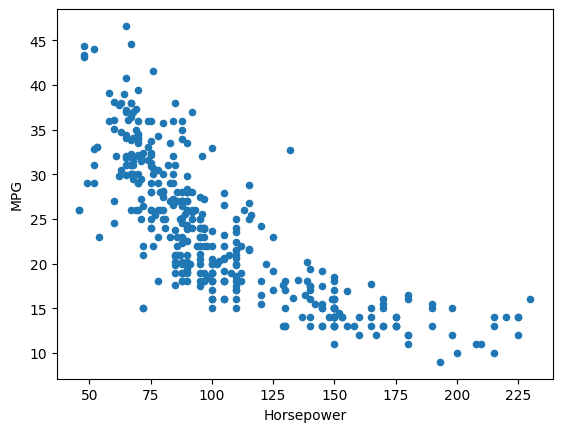

In [13]:
df.plot.scatter(x="Horsepower", y="MPG")

<Axes: xlabel='Weight', ylabel='MPG'>

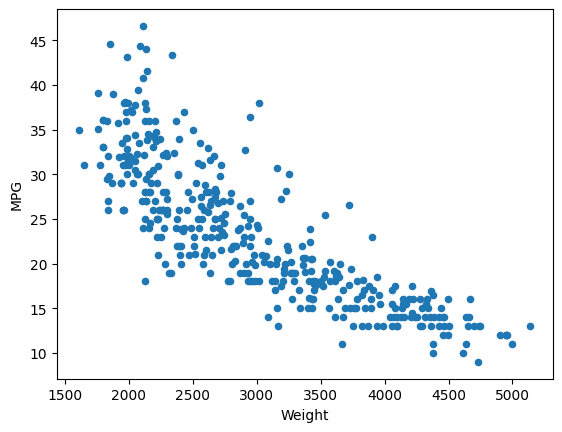

In [14]:
df.plot.scatter(x="Weight", y="MPG")

<Axes: xlabel='Cylinders', ylabel='MPG'>

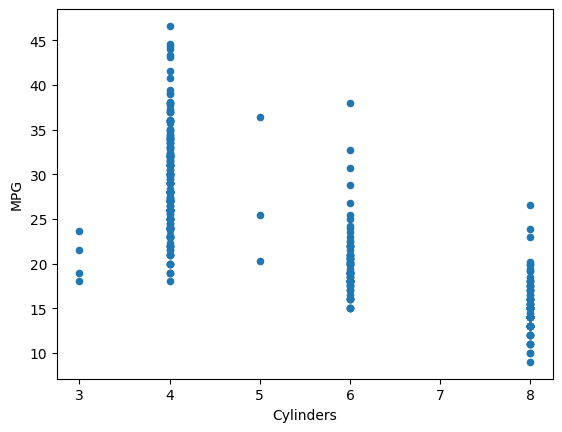

In [16]:
df.plot.scatter(x="Cylinders", y="MPG")

<Axes: xlabel='Horsepower', ylabel='Weight'>

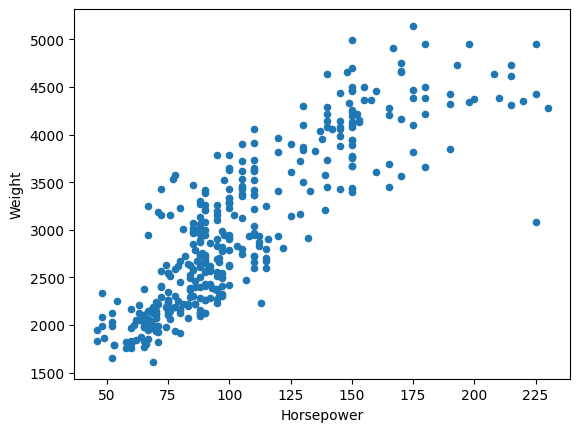

In [29]:
df.plot.scatter(x='Horsepower', y='Weight')

## Task 2 - Identify the target column and the data columns


First we identify the target. Target is the value that our machine learning model needs to predict


In [30]:
target = df["MPG"]

We identify the features next. Features are the values our machine learning model learns from


In [31]:
features = df[["Horsepower", "Weight"]]

## Task 3 - Build and Train a Linear Regression Model


Create a LR model


In [32]:
lr = LinearRegression()

Train/Fit the model


In [33]:
lr.fit(features, target)

LinearRegression()

## Task 4 - Evaluate the model and make predictions


Your model is now trained. Time to evaluate the model.


In [34]:
# Higher the score, better the model.
lr.score(features, target)

0.7063752737298348

Make predictions. Let us predict the mileage for a car with HorsePower = 100 and Weight = 2000


In [35]:
lr.predict([[100, 2000]])

array([29.3216098])

In [39]:
features2 = df[["Horsepower", "Weight", "Cylinders"]]
# lr = LinearRegression()

In [40]:
lr.fit(features2, target)

lr.score(features2, target)

0.7076518943128076

In [41]:
lr.predict([[100, 2000, 4]])

array([29.3635499])

# Exercises


In [43]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diamonds.csv"

### Exercise 1 - Loading a dataset (diamond dataset)


In [44]:
df2 = pd.read_csv(URL2)

In [45]:
df2.sample(2)

,s,carat,cut,color,clarity,depth,table,price,x,y,z
42465,42466,0.55,Premium,G,SI1,61.3,59.0,1316,5.23,5.28,3.22
27983,27984,0.30,Premium,E,VS2,62.3,58.0,658,4.28,4.32,2.68


In [46]:
df2.shape

(53940, 11)

<Axes: xlabel='carat', ylabel='price'>

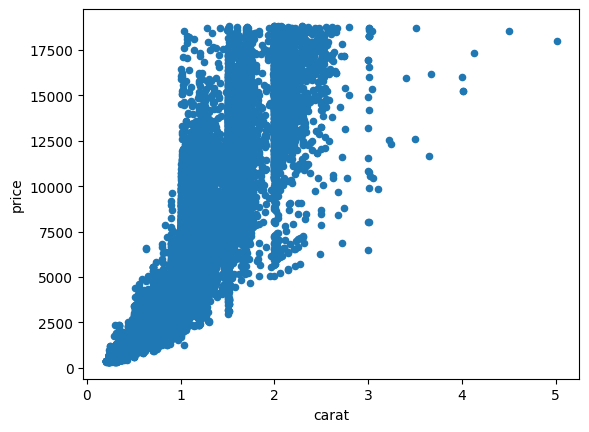

In [63]:
df2.plot.scatter(x="carat", y="price")

<Axes: xlabel='price', ylabel='depth'>

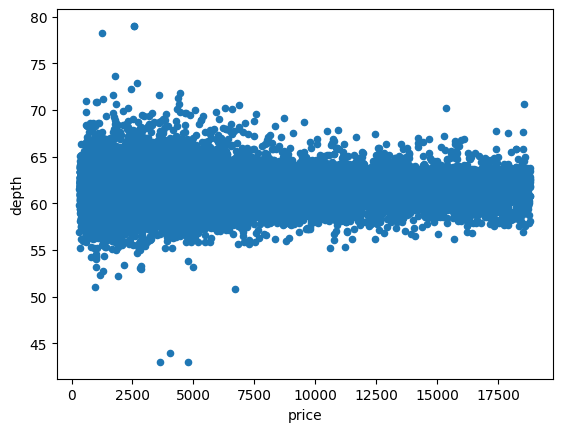

In [65]:
df2.plot.scatter(x="price", y="depth")

<Axes: xlabel='clarity'>

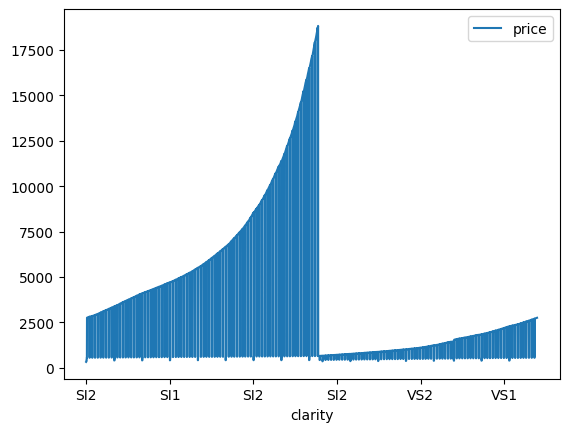

In [68]:
df2.plot.line(x='clarity', y='price')

### Exercise 2 - Identify the target column and the data columns


- use the price column as target
- use the columns carat and depth as features


In [50]:
target = df2['price']
features = df2[['carat', 'depth']]

### Exercise 3 - Build and Train a new Linear Regression Model


Create a new Linear Regression Model


In [51]:
lr2 = LinearRegression()
lr2.fit(features, target)

LinearRegression()

### Exercise 4 - Evaluate the model


Print the score of the model


In [52]:
# your code goes here
lr2.score(features, target)

0.8506754571636563

### Exercise 5 - Predict the price of a diamond


Predict the price of a diamond with carat = 0.3 and depth = 60


In [53]:
# your code goes herelr2.predict([[0.3, 60]])
lr2.predict([[0.3, 60]])

array([244.95605225])

In [60]:
df2.sample(5)

,s,carat,cut,color,clarity,depth,table,price,x,y,z
35137,35138,0.39,Very Good,E,VS2,61.3,61.0,889,4.66,4.70,2.87
3515,3516,0.71,Ideal,F,VS1,61.5,57.0,3404,5.70,5.74,3.52
14595,14596,1.21,Premium,D,SI2,62.2,60.0,5889,6.80,6.83,4.24
30225,30226,0.33,Ideal,E,VS2,60.6,55.0,723,4.48,4.50,2.72
9701,9702,0.32,Ideal,D,SI1,62.7,54.0,589,4.35,4.39,2.74


In [58]:
features2 = df2[['carat', 'depth', 'x', 'y', 'z']]

lr2.fit(features2, target)

lr2.score(features2, target)

0.8563387079253134

In [59]:
lr2.predict([[0.3, 60, 4.4, 4.43, 2.03]])

array([519.99737234])

Congratulations! You have completed this lab.<br>
You are encouraged to experiment creating models with more than 2 feature columns


## Authors


[Ramesh Sannareddy](https://www.linkedin.com/in/rsannareddy/)


## Contributors

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description      |
| ----------------- | ------- | ----------------- | ----------------------- |
| 2023-04-14        | 0.1     | Ramesh Sannareddy | Initial Version Created |
| 2023-06-20        | 0.3     | Vicky Kuo         | Proofreading            |


Copyright © 2023 IBM Corporation. All rights reserved.
